# IMPORTING NECESSARY LIBRARIES

In [16]:
# Data handling and processing
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, 
    StackingClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Deep learning models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Evaluation metrics and reporting
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System performance
import time
import psutil
import os


# DATASET LOADING

In [77]:
dataset = pd.read_excel('dms_dataset.xlsx', sheet_name='Sheet1')

In [78]:
dataset

,Label,Modulation,SNR,SFD_InPhase,SFD_Quadrature,Energy_InPhase,Energy_Quadrature,PAPR_InPhase,PAPR_Quadrature,MeanAmplitude_InPhase,MeanAmplitude_Quadrature,Variance_InPhase,Variance_Quadrature,ZeroCrossingRate_InPhase,ZeroCrossingRate_Quadrature,Skewness_InPhase,Skewness_Quadrature,Kurtosis_InPhase,Kurtosis_Quadrature
0,1,AM-SSB,12,1.389887,2.477678,0.299287,0.186513,1.541296,1.062754,0.235744,-0.145660,0.516898,0.588429,1.377061,2.279305,-0.268404,-0.466154,0.527881,0.904542
1,1,AM-SSB,12,2.061046,2.538575,0.344202,0.129014,2.090342,2.302009,0.145204,-0.125706,0.554890,0.535314,1.971151,2.321764,0.288641,0.108254,1.253547,1.116104
2,1,AM-SSB,12,1.786481,2.020951,0.396531,0.105459,0.859132,0.821607,0.200835,-0.099670,0.606964,0.525118,1.758976,2.279305,-0.296178,-0.350040,0.652890,0.311744
3,1,AM-SSB,12,1.847495,2.020951,0.099229,0.277851,1.306809,1.055684,-0.036421,0.113504,0.325972,0.548421,2.098456,1.982093,-0.126645,0.236689,0.929949,0.110764
4,1,AM-SSB,12,1.847495,1.807812,0.231044,0.145545,1.230891,1.147300,0.181197,-0.068429,0.446333,0.535205,1.971151,1.982093,0.348563,0.499100,0.470711,0.690251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2,8PSK,18,-0.471052,-0.506273,0.284771,-0.560461,-0.485600,-0.092056,0.538706,-0.450147,0.498273,-0.149570,-0.405208,-0.395603,0.259065,-0.694458,-1.007082,-0.408710
24996,2,8PSK,18,-0.471052,-0.506273,-0.184225,-0.025081,-0.140166,-0.444401,0.044937,0.279860,0.004583,0.266369,-0.277903,-0.522979,0.451402,-1.579398,-0.755197,-0.510973
24997,2,8PSK,18,-0.501559,-0.475825,-0.060098,-0.180136,-0.220909,-0.271484,0.036185,-0.168606,0.164915,-0.025980,-0.320338,-0.268226,0.495647,-1.819160,-0.563818,0.343914
24998,2,8PSK,18,-0.440545,-0.475825,-0.202274,0.055210,0.121119,-0.035659,-0.142313,0.137181,0.002803,0.451635,-0.150598,-0.353144,-0.610345,1.029478,-0.234436,-0.456707


In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataset.dropna(inplace=True)

X = dataset[[    'SNR','SFD_InPhase', 'SFD_Quadrature',
    'Energy_InPhase', 'Energy_Quadrature',
    'PAPR_InPhase', 'PAPR_Quadrature',
    'MeanAmplitude_InPhase', 'MeanAmplitude_Quadrature',
    'Variance_InPhase', 'Variance_Quadrature',
    'ZeroCrossingRate_InPhase', 'ZeroCrossingRate_Quadrature',
    'Skewness_InPhase', 'Skewness_Quadrature',
    'Kurtosis_InPhase', 'Kurtosis_Quadrature']]
y = dataset['Label']

label_encoder_modulation = LabelEncoder()
dataset['Modulation'] = label_encoder_modulation.fit_transform(dataset['Modulation'])

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

print(X.head())
print(y[:5])


   SNR  SFD_InPhase  SFD_Quadrature  Energy_InPhase  Energy_Quadrature  \
0   12     1.389887        2.477678        0.299287           0.186513   
1   12     2.061046        2.538575        0.344202           0.129014   
2   12     1.786481        2.020951        0.396531           0.105459   
3   12     1.847495        2.020951        0.099229           0.277851   
4   12     1.847495        1.807812        0.231044           0.145545   

   PAPR_InPhase  PAPR_Quadrature  MeanAmplitude_InPhase  \
0      1.541296         1.062754               0.235744   
1      2.090342         2.302009               0.145204   
2      0.859132         0.821607               0.200835   
3      1.306809         1.055684              -0.036421   
4      1.230891         1.147300               0.181197   

   MeanAmplitude_Quadrature  Variance_InPhase  Variance_Quadrature  \
0                 -0.145660          0.516898             0.588429   
1                 -0.125706          0.554890             0.

In [84]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)



In [86]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



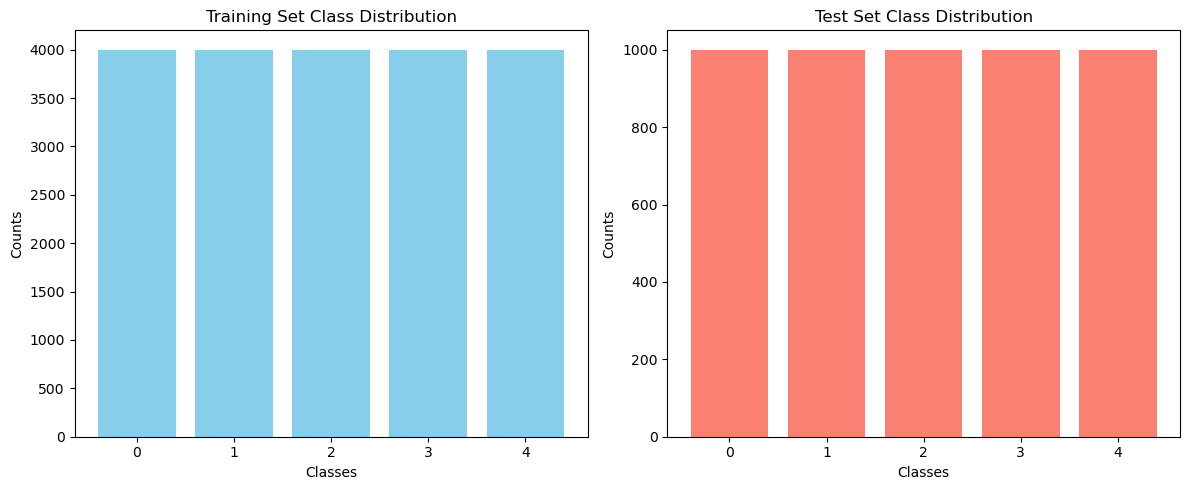

In [88]:


train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(train_classes, train_counts, color='skyblue')
ax[0].set_title('Training Set Class Distribution')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Counts')
ax[0].set_xticks(train_classes)

ax[1].bar(test_classes, test_counts, color='salmon')
ax[1].set_title('Test Set Class Distribution')
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Counts')
ax[1].set_xticks(test_classes)

plt.tight_layout()
plt.show()



# TRAINING AND EVALUATING INDIVIDUAL CLASSIFIER PERFORMANCE


Training Decision Tree...
Decision Tree Accuracy: 98.70%
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.97      0.97      0.97      1000
           2       0.98      0.98      0.98      1000
           3       0.99      0.99      0.99      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



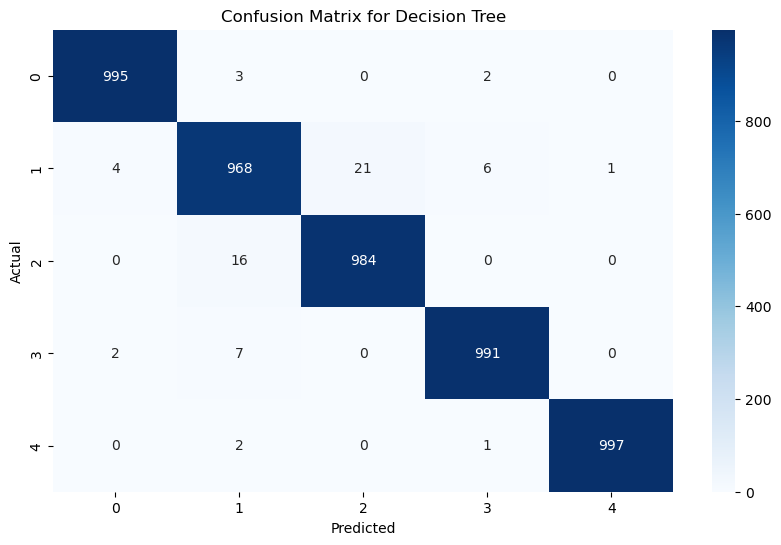


Training Random Forest...
Random Forest Accuracy: 99.28%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.98      0.99      0.98      1000
           2       0.99      0.98      0.99      1000
           3       1.00      0.99      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



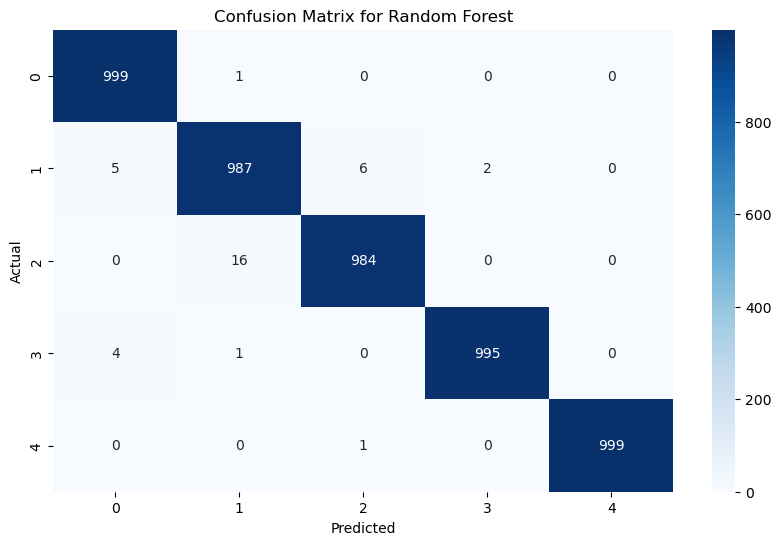


Training Gradient Boosting...
Gradient Boosting Accuracy: 99.08%
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.98      0.98      0.98      1000
           2       0.98      0.98      0.98      1000
           3       0.99      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



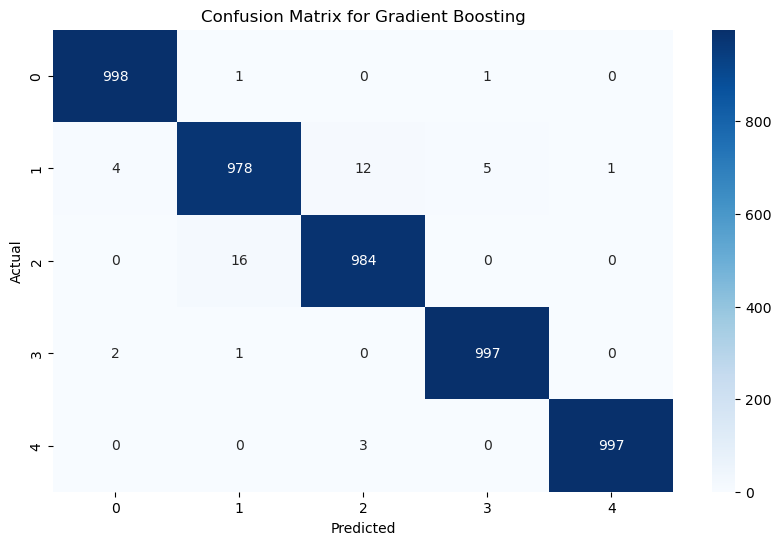


Training Naive Bayes...
Naive Bayes Accuracy: 88.94%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.77      0.67      0.72      1000
           2       0.76      0.95      0.84      1000
           3       0.96      0.86      0.91      1000
           4       1.00      0.97      0.98      1000

    accuracy                           0.89      5000
   macro avg       0.90      0.89      0.89      5000
weighted avg       0.90      0.89      0.89      5000



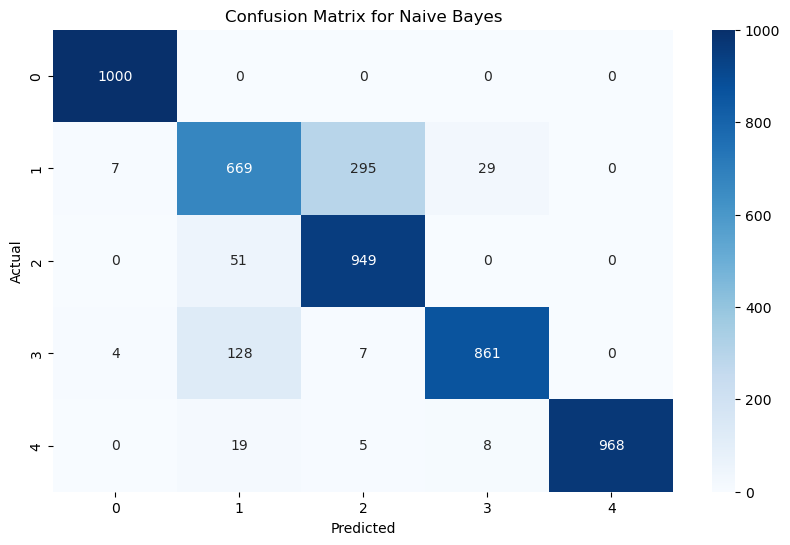


Training Logistic Regression...
Logistic Regression Accuracy: 97.66%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.96      0.96      0.96      1000
           2       0.95      0.97      0.96      1000
           3       0.99      0.98      0.99      1000
           4       0.99      0.97      0.98      1000

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



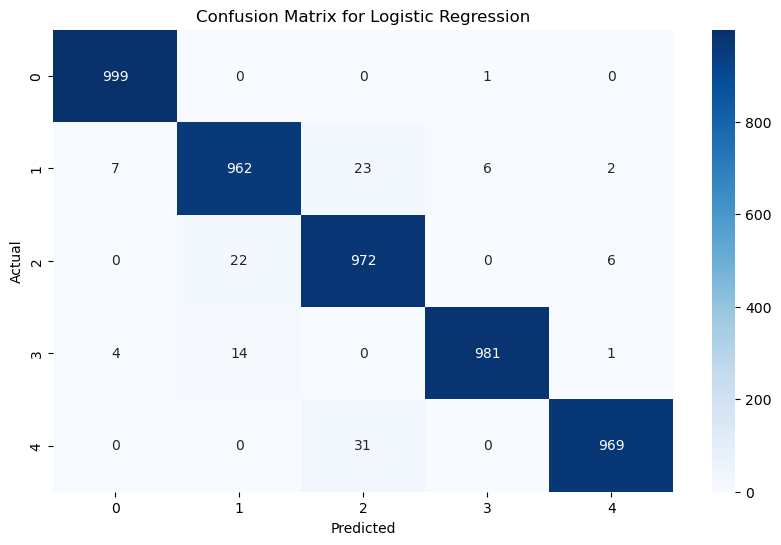


Training KNN...
KNN Accuracy: 95.82%
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.97      0.89      0.93      1000
           2       0.86      0.97      0.91      1000
           3       1.00      0.99      0.99      1000
           4       0.99      0.94      0.97      1000

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



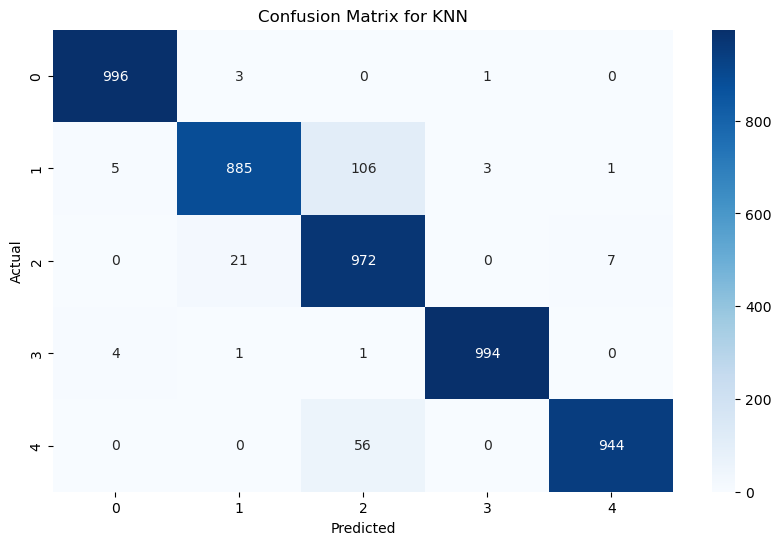


Training SVM...
SVM Accuracy: 98.06%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.97      0.97      0.97      1000
           2       0.96      0.98      0.97      1000
           3       0.99      0.98      0.99      1000
           4       0.99      0.97      0.98      1000

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



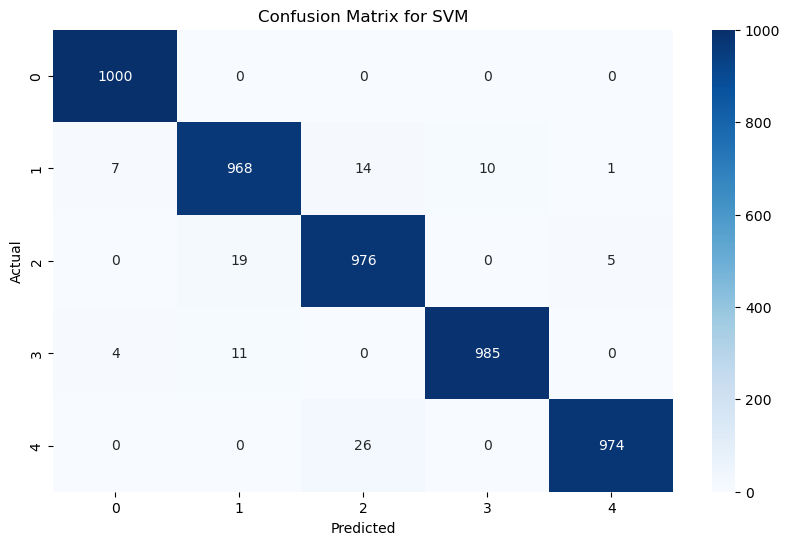


Training XGBoost...
XGBoost Accuracy: 99.66%
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



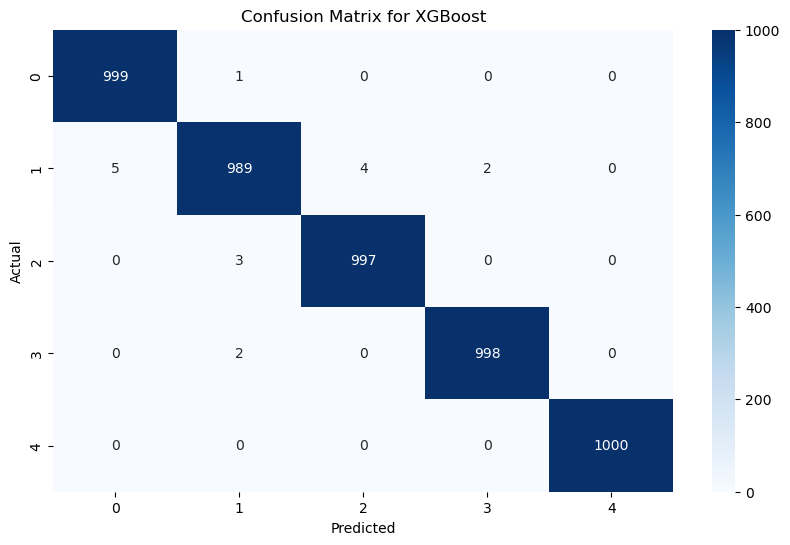


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3385
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 17
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 99.64%
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.99

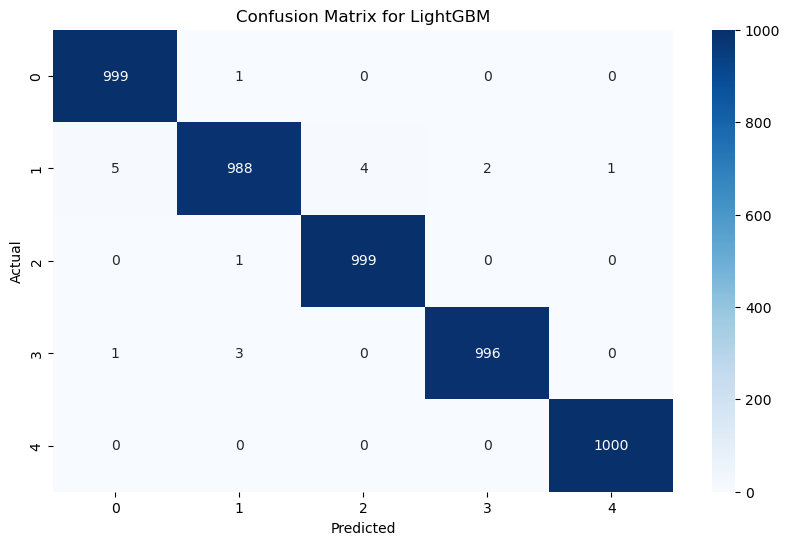


Training CatBoost...
CatBoost Accuracy: 99.46%
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.99      0.98      0.99      1000
           2       0.99      0.99      0.99      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



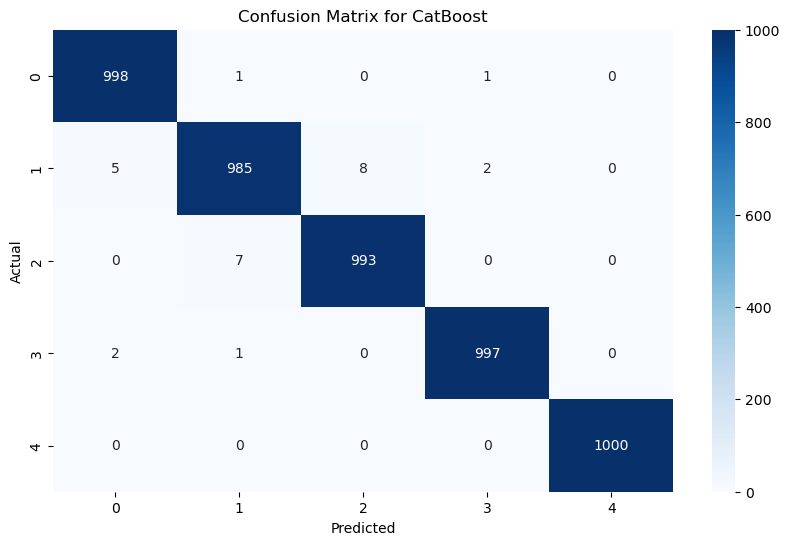


Sorted Classifier Accuracies:
XGBoost: 99.6600%
LightGBM: 99.6400%
CatBoost: 99.4600%
Random Forest: 99.2800%
Gradient Boosting: 99.0800%
Decision Tree: 98.7000%
SVM: 98.0600%
Logistic Regression: 97.6600%
KNN: 95.8200%
Naive Bayes: 88.9400%


In [94]:


def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name):
    print(f"\nTraining {name}...")

    if X_train.ndim == 3:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(set(y_train)), yticklabels=sorted(set(y_train)))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    return acc  

classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=1),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}

accuracy_results = {}

for name, clf in classifiers.items():
    accuracy = train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test, name)
    accuracy_results[name] = accuracy

sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

print("\nSorted Classifier Accuracies:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.4f}%")


# HYPERPARAMETER TUNING


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}

Training Decision Tree...
Decision Tree Accuracy: 98.74%
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.97      0.97      0.97      1000
           2       0.98      0.98      0.98      1000
           3       0.99      0.99      0.99      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



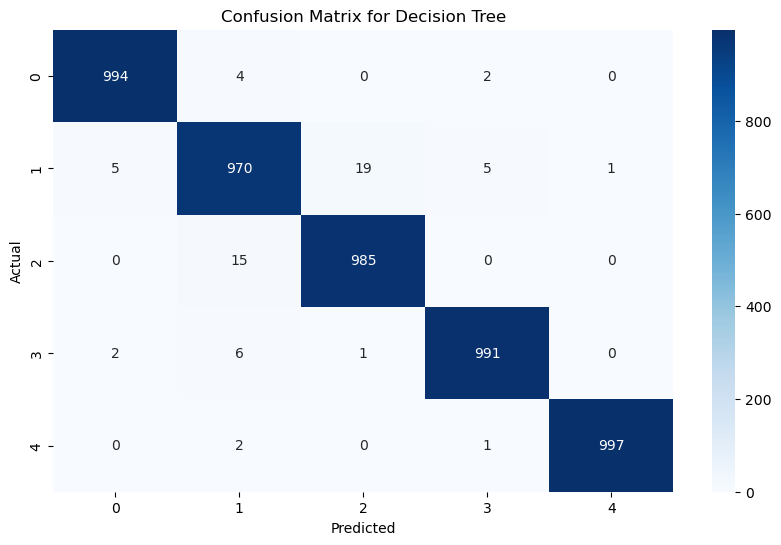


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

Training Random Forest...
Random Forest Accuracy: 99.20%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.98      0.98      0.98      1000
           2       0.99      0.98      0.99      1000
           3       1.00      0.99      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



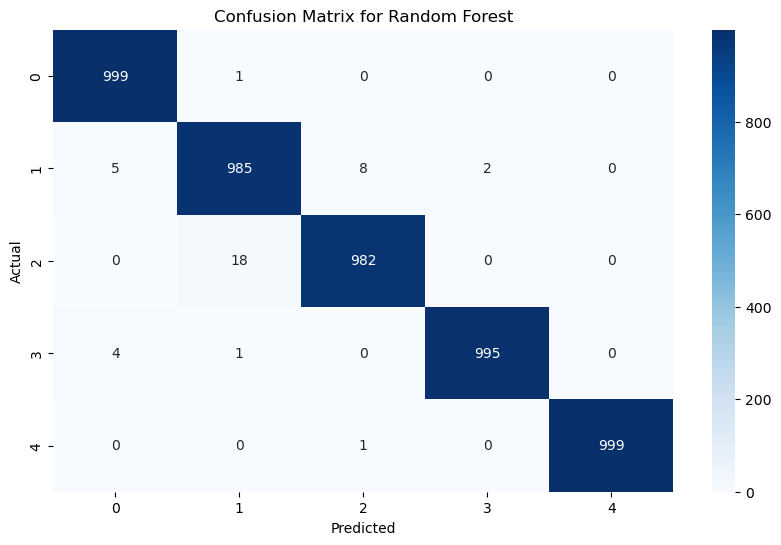


Best parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}

Training KNN...
KNN Accuracy: 95.96%
Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.98      0.89      0.93      1000
           2       0.86      0.97      0.91      1000
           3       0.99      0.99      0.99      1000
           4       0.99      0.95      0.97      1000

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



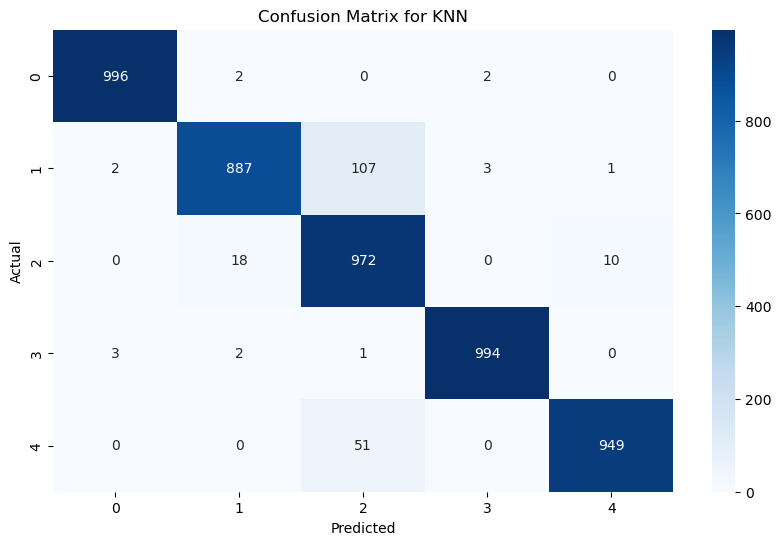


Best parameters for SVM: {'C': 10, 'kernel': 'linear'}

Training SVM...
SVM Accuracy: 98.84%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.98      0.97      0.97      1000
           2       0.99      0.99      0.99      1000
           3       0.99      0.98      0.99      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



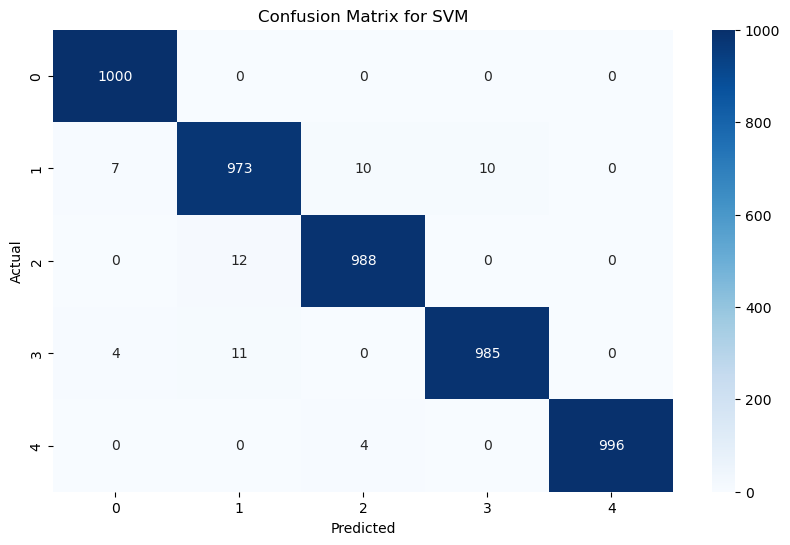


No hyperparameter tuning for Naive Bayes. Training with default parameters...

Training Naive Bayes...
Naive Bayes Accuracy: 88.94%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.77      0.67      0.72      1000
           2       0.76      0.95      0.84      1000
           3       0.96      0.86      0.91      1000
           4       1.00      0.97      0.98      1000

    accuracy                           0.89      5000
   macro avg       0.90      0.89      0.89      5000
weighted avg       0.90      0.89      0.89      5000



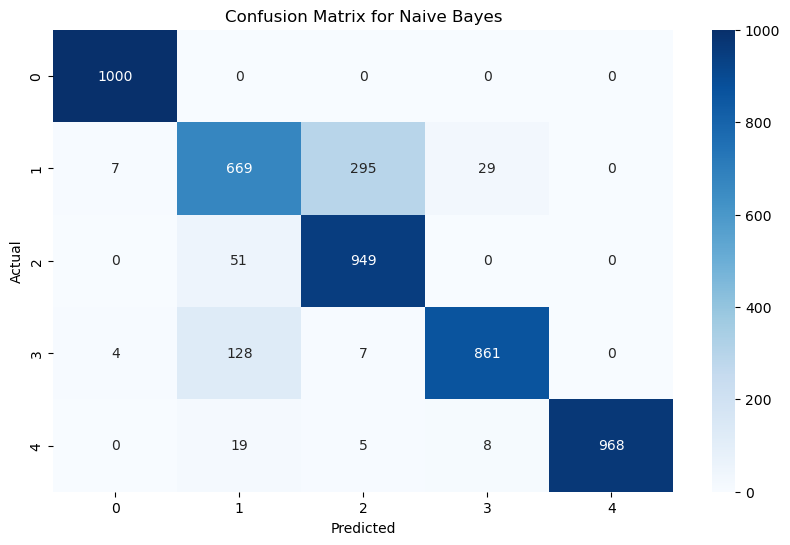

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}

Training Logistic Regression...
Logistic Regression Accuracy: 97.94%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.97      0.97      0.97      1000
           2       0.96      0.97      0.97      1000
           3       0.99      0.98      0.99      1000
           4       0.99      0.98      0.98      1000

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


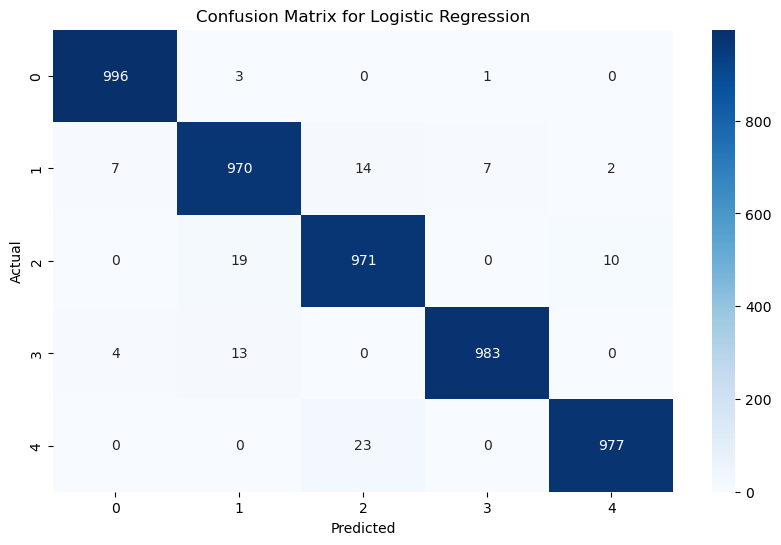


Sorted Classifier Accuracies:
Random Forest: 99.2000%
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

SVM: 98.8400%
Best parameters: {'C': 10, 'kernel': 'linear'}

Decision Tree: 98.7400%
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}

Logistic Regression: 97.9400%
Best parameters: {'C': 10, 'solver': 'lbfgs'}

KNN: 95.9600%
Best parameters: {'n_neighbors': 5, 'weights': 'distance'}

Naive Bayes: 88.9400%
Best parameters: {}



In [29]:


def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name):
    print(f"\nTraining {name}...")

    if X_train.ndim == 3:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    return acc  

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "Naive Bayes": {}
}

accuracy_results = {}
best_params = {}

for name, clf in classifiers.items():
    if param_grids[name]:  
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_clf = grid_search.best_estimator_
        best_param = grid_search.best_params_
        print(f"\nBest parameters for {name}: {best_param}")

        accuracy = train_and_evaluate_classifier(best_clf, X_train, y_train, X_test, y_test, name)
    else:
        print(f"\nNo hyperparameter tuning for {name}. Training with default parameters...")
        accuracy = train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test, name)
        best_param = {}

    accuracy_results[name] = accuracy
    best_params[name] = best_param

sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

print("\nSorted Classifier Accuracies:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.4f}%")
    print(f"Best parameters: {best_params[name]}\n")


# STACKING 

In [31]:


from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2),
    "Naive Bayes": GaussianNB(),  # No hyperparameter tuning for Naive Bayes
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "SVM": SVC(C=10, kernel='linear', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}
meta_classifier = LogisticRegression(max_iter=200)

combinations_of_classifiers = list(combinations(classifiers.items(), 2))

accuracy_results = {}

for (name1, clf1), (name2, clf2) in combinations_of_classifiers:
    print(f"\nStacking {name1} and {name2} with Logistic Regression as meta-classifier")
    
    try:
        stack_clf = StackingClassifier(
            estimators=[(name1, clf1), (name2, clf2)],
            final_estimator=meta_classifier,
            stack_method='predict_proba'
        )

        stack_clf.fit(X_train, y_train)
        y_pred = stack_clf.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred) * 100
        model_name = f"{name1} + {name2}"
        accuracy_results[model_name] = acc
        
        print(f"Stacked Model Accuracy ({model_name}): {acc:.2f}%")
        print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
        print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    except Exception as e:
        print(f"Error with {name1} + {name2}: {e}")

sorted_accuracy = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

print("\nModel Accuracies in Descending Order:")
for model, accuracy in sorted_accuracy:
    print(f"{model}: {accuracy:.2f}%")



Stacking Decision Tree and Random Forest with Logistic Regression as meta-classifier
Stacked Model Accuracy (Decision Tree + Random Forest): 99.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.98      0.98      0.98      1000
           2       0.99      0.98      0.99      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000

Confusion Matrix:
[[997   1   0   2   0]
 [  5 985   8   2   0]
 [  0  15 985   0   0]
 [  2   2   0 996   0]
 [  0   1   1   0 998]]


Stacking Decision Tree and Naive Bayes with Logistic Regression as meta-classifier
Stacked Model Accuracy (Decision Tree + Naive Bayes): 98.72%
Classification Report:
              precision    recall  f

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:37:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:37:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:37:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:37:13] WARNING

Stacked Model Accuracy (Decision Tree + XGBoost): 99.60%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 997    1    0    2    0]
 [   5  989    4    2    0]
 [   0    3  997    0    0]
 [   0    3    0  997    0]
 [   0    0    0    0 1000]]


Stacking Decision Tree and LightGBM with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:45:35] WARNING

Stacked Model Accuracy (Random Forest + XGBoost): 99.62%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 999    1    0    0    0]
 [   5  989    4    2    0]
 [   0    4  996    0    0]
 [   0    3    0  997    0]
 [   0    0    0    0 1000]]


Stacking Random Forest and LightGBM with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:11] WARNING

Stacked Model Accuracy (Naive Bayes + XGBoost): 99.64%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 999    1    0    0    0]
 [   5  989    4    2    0]
 [   0    4  996    0    0]
 [   0    2    0  998    0]
 [   0    0    0    0 1000]]


Stacking Naive Bayes and LightGBM with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 338

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:03] WARNING

Stacked Model Accuracy (Gradient Boosting + XGBoost): 99.60%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 998    1    0    1    0]
 [   5  987    4    3    1]
 [   0    3  997    0    0]
 [   0    2    0  998    0]
 [   0    0    0    0 1000]]


Stacking Gradient Boosting and LightGBM with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:33] WARNING

Stacked Model Accuracy (KNN + XGBoost): 99.60%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 997    2    0    1    0]
 [   5  989    4    2    0]
 [   0    3  997    0    0]
 [   0    3    0  997    0]
 [   0    0    0    0 1000]]


Stacking KNN and LightGBM with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3385
[LightGBM] [In

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:13:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:22] WARNING

Stacked Model Accuracy (SVM + XGBoost): 99.62%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 999    1    0    0    0]
 [   5  989    4    2    0]
 [   0    4  996    0    0]
 [   0    3    0  997    0]
 [   0    0    0    0 1000]]


Stacking SVM and LightGBM with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3385
[LightGBM] [In

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3385
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 17
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3376
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 17
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:17:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:17:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:17:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:17:15] WARNING

Stacked Model Accuracy (XGBoost + CatBoost): 99.58%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      0.99      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Confusion Matrix:
[[ 998    1    0    1    0]
 [   5  989    4    2    0]
 [   0    5  995    0    0]
 [   1    2    0  997    0]
 [   0    0    0    0 1000]]


Stacking LightGBM and CatBoost with Logistic Regression as meta-classifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3385
[Lig

# BAGGING

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),  # Increased max_iter for convergence
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # Removed use_label_encoder
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}

results = {}

for name, classifier in classifiers.items():
    X_train_data = X_train_scaled if name in ["Logistic Regression", "SVM"] else X_train
    X_test_data = X_test_scaled if name in ["Logistic Regression", "SVM"] else X_test

    bagging_clf = BaggingClassifier(estimator=classifier, n_estimators=10, random_state=42)
    
    bagging_clf.fit(X_train_data, y_train)
    y_pred = bagging_clf.predict(X_test_data)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy

sorted_results = sorted(results.items(), key=lambda x: x[1])

print("\nBagging Classifier Accuracies (Ascending Order):")
for name, accuracy in sorted_results:
    print(f"{name} Bagging Classifier Accuracy: {accuracy:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3391
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 17
[LightGBM] [Info] Start training from score -1.621764
[LightGBM] [Info] Start training from score -1.638352
[LightGBM] [Info] Start training from score -1.599735
[LightGBM] [Info] Start training from score -1.590616
[LightGBM] [Info] Start training from score -1.597509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

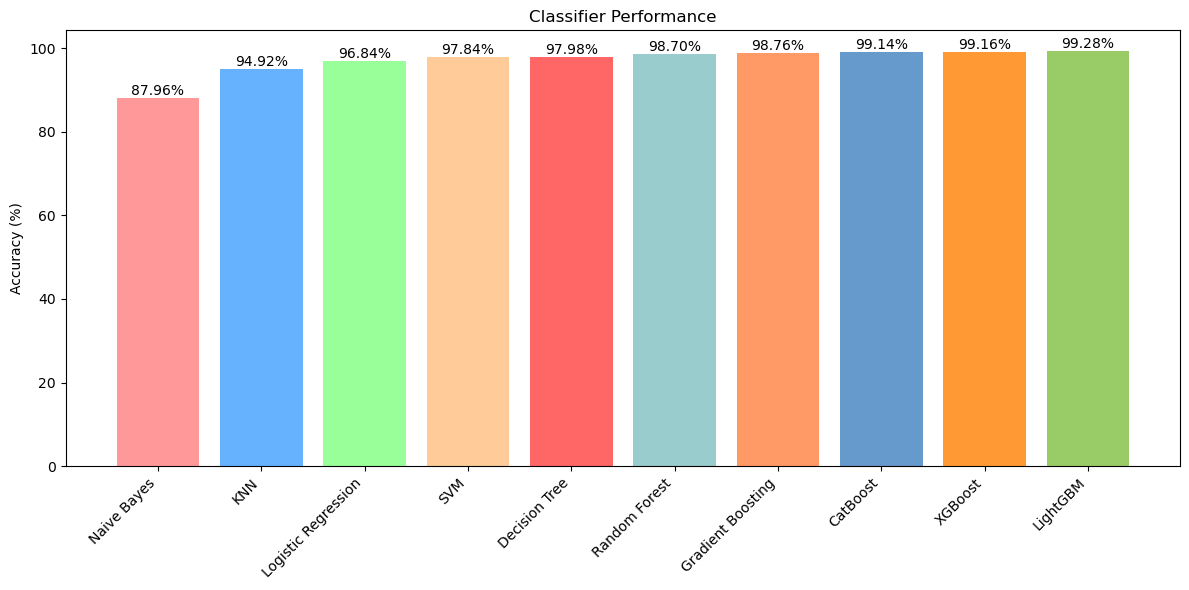

In [40]:
import matplotlib.pyplot as plt

classifiers = [
    'Naive Bayes', 'KNN', 'Logistic Regression', 'SVM', 
    'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'CatBoost', 'XGBoost', 'LightGBM'
]

accuracy = [
    87.96, 94.92, 96.84, 97.84, 
    97.98, 98.70, 98.76, 
    99.14, 99.16, 99.28
]

# Define colors for each bar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', 
          '#FF6666', '#99CCCC', '#FF9966', 
          '#6699CC', '#FF9933', '#99CC66']

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjusted figure size for better visibility
bars = plt.bar(classifiers, accuracy, color=colors)

# Adding labels and title
plt.ylabel('Accuracy (%)')
plt.title('Classifier Performance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add accuracy on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', 
             ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


# CNN MODEL

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6556 - loss: 1.0823 - val_accuracy: 0.9628 - val_loss: 0.1256
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1303 - val_accuracy: 0.9798 - val_loss: 0.0819
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.1009 - val_accuracy: 0.9808 - val_loss: 0.0651
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0874 - val_accuracy: 0.9802 - val_loss: 0.0677
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0764 - val_accuracy: 0.9844 - val_loss: 0.0503
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9808 - loss: 0.0619 - val_accuracy: 0.9842 - val_loss: 0.0459
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.0681 - val_accuracy: 0.9864 - val_loss: 0.0446
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0499 - val_accuracy: 0.

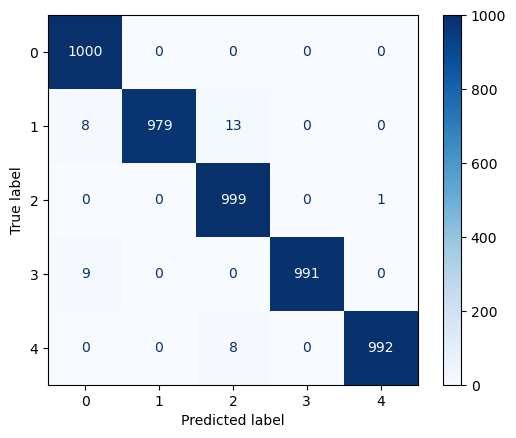

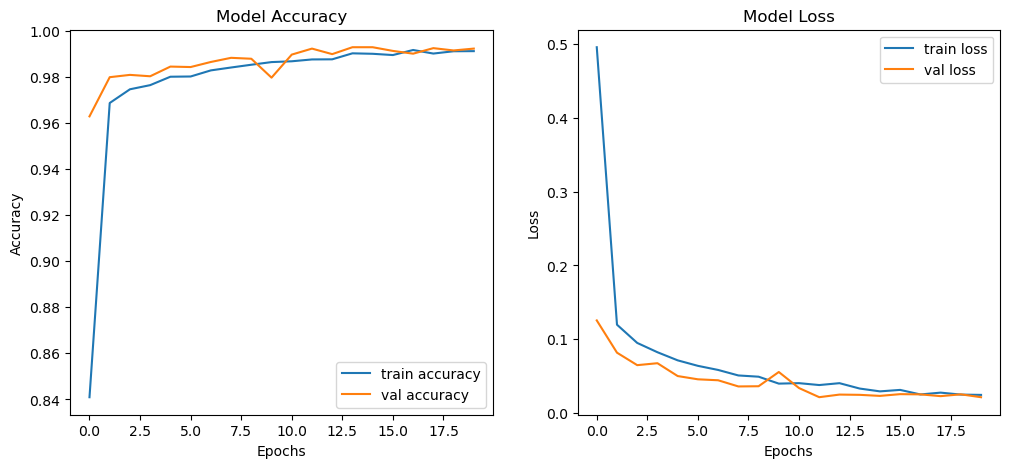

In [42]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(30, activation='softmax')  # Adjust number of classes if needed
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

process = psutil.Process(os.getpid())
initial_memory = process.memory_info().rss / (1024 ** 2)  # in MB
start_time = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

training_time = time.time() - start_time
peak_memory = process.memory_info().rss / (1024 ** 2)  # in MB

start_prediction_time = time.time()
y_pred = np.argmax(model.predict(X_test), axis=-1)
prediction_time = time.time() - start_prediction_time

model_size = sum([var.numpy().nbytes for var in model.trainable_variables]) / (1024 ** 2)  # in MB

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time (on test set): {prediction_time:.2f} seconds")
print(f"Initial Memory Usage: {initial_memory:.2f} MB")
print(f"Peak Memory Usage: {peak_memory:.2f} MB")
print(f"Model Size: {model_size:.2f} MB")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


# NB+XG MODEL

In [44]:
print(X_train.shape)
print(X_test.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



(20000, 17, 1)
(5000, 17, 1)


D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:22] WARNING

Stacked Model Accuracy (Naive Bayes + XGBoost): 99.64%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000


Model Accuracies:
Naive Bayes + XGBoost: 99.64%
Training Time: 2.93 seconds
Prediction Time (on test set): 0.02 seconds


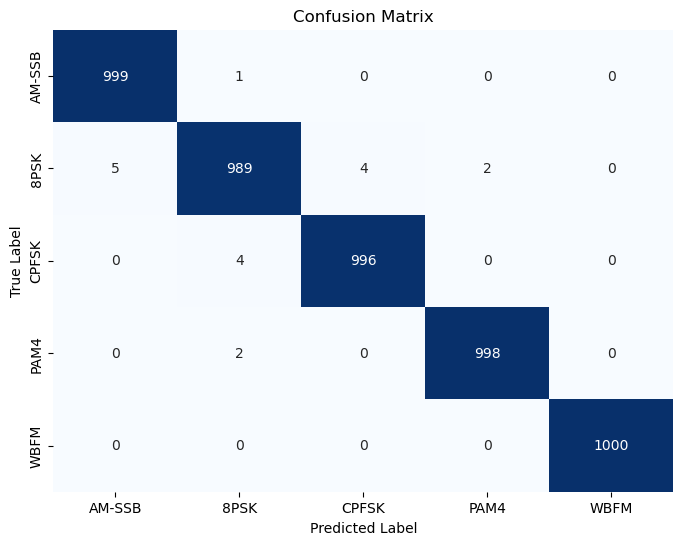

In [92]:


classifiers = {
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

meta_classifier = LogisticRegression(max_iter=200)

accuracy_results = {}

stack_clf = StackingClassifier(
    estimators=list(classifiers.items()),
    final_estimator=meta_classifier,
    stack_method='predict_proba'
)

start_time = time.time()

stack_clf.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

start_prediction_time = time.time()

y_pred = stack_clf.predict(X_test)

end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

acc = accuracy_score(y_test, y_pred) * 100
model_name = "Naive Bayes + XGBoost"
accuracy_results[model_name] = acc

print(f"Stacked Model Accuracy ({model_name}): {acc:.2f}%")

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

print("\nModel Accuracies:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.2f}%")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time (on test set): {prediction_time:.2f} seconds")

scheme_names = ["AM-SSB", "8PSK", "CPFSK", "PAM4", "WBFM"]

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=scheme_names, yticklabels=scheme_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
print(X_train.shape)
print(y_train.shape)


(20000, 17)
(20000,)


# DNN MODEL

In [48]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Flatten(input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(30, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

process = psutil.Process(os.getpid())
initial_memory = process.memory_info().rss / (1024 ** 2)
start_time = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

training_time = time.time() - start_time
peak_memory = process.memory_info().rss / (1024 ** 2)

start_prediction_time = time.time()
y_pred = np.argmax(model.predict(X_test), axis=-1)
prediction_time = time.time() - start_prediction_time

model_size = sum([var.numpy().nbytes for var in model.trainable_variables]) / (1024 ** 2)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time (on test set): {prediction_time:.2f} seconds")
print(f"Initial Memory Usage: {initial_memory:.2f} MB")
print(f"Peak Memory Usage: {peak_memory:.2f} MB")
print(f"Model Size: {model_size:.2f} MB")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_rep)


Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6029 - loss: 1.4219 - val_accuracy: 0.9646 - val_loss: 0.1485
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9393 - loss: 0.2089 - val_accuracy: 0.9716 - val_loss: 0.1008
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 0.1497 - val_accuracy: 0.9740 - val_loss: 0.0934
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9633 - loss: 0.1227 - val_accuracy: 0.9760 - val_loss: 0.0788
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9649 - loss: 0.1157 - val_accuracy: 0.9764 - val_loss: 0.0758
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.0989 - val_accuracy: 0.9772 - val_loss: 0.0752
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.0989 - val_accuracy: 0.9784 - val_loss: 0.0683
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9736 - loss: 0.0905 - val_accuracy: 0.9800 - val_

# COMPARITIVE ANALYSIS

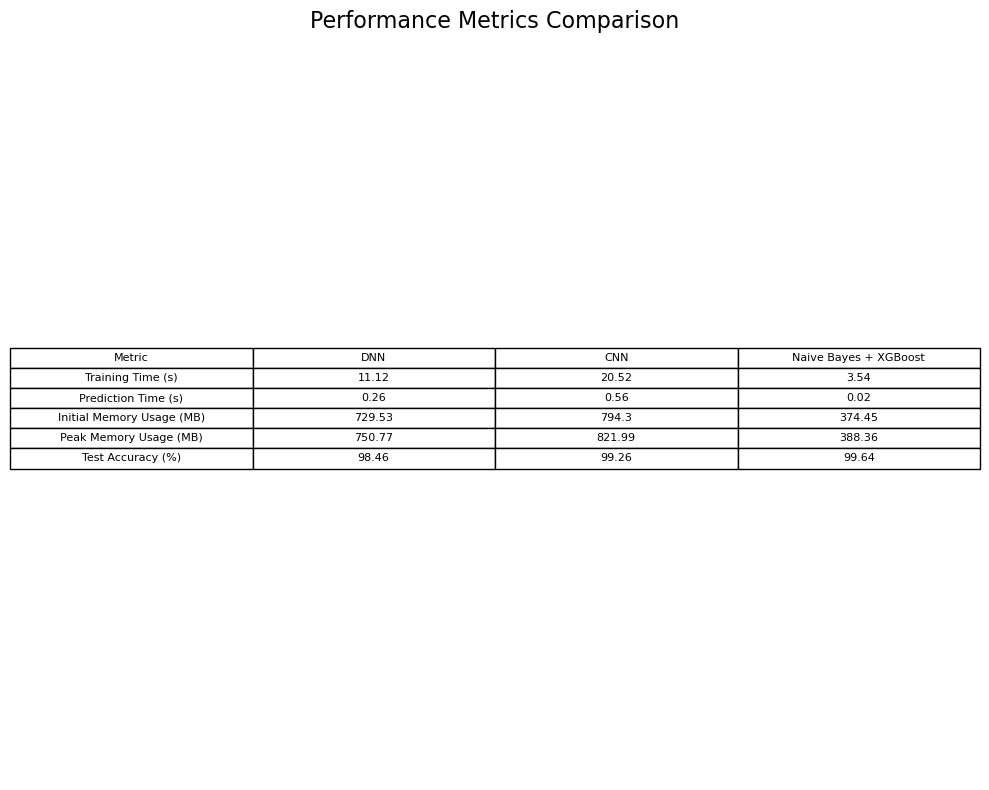

In [50]:
import matplotlib.pyplot as plt

# Data for the merged table without Model Size
methods = ['DNN', 'CNN', 'Naive Bayes + XGBoost']
metrics = [
    'Training Time (s)', 
    'Prediction Time (s)', 
    'Initial Memory Usage (MB)', 
    'Peak Memory Usage (MB)', 
    'Test Accuracy (%)'
]
values = [
    [11.12, 0.26, 729.53, 750.77, 98.46],  # DNN
    [20.52, 0.56, 794.30, 821.99, 99.26],  # CNN
    [3.54, 0.02, 374.45, 388.36, 99.64]    # Naive Bayes + XGBoost
]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Combine the table data
table_data = [['Metric'] + methods]  # Header
for i, metric in enumerate(metrics):
    table_data.append([metric] + [values[j][i] for j in range(len(methods))])

# Create the merged table
table = ax.table(cellText=table_data, colLabels=None, loc='center', cellLoc='center')
ax.axis('off')  # Hide axes
ax.set_title('Performance Metrics Comparison', fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the table
plt.show()


# CROSS VALIDATION AND FEATURE IMPORTANCE

In [52]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

meta_classifier = LogisticRegression(max_iter=200)

stack_clf = StackingClassifier(
    estimators=list(classifiers.items()),
    final_estimator=meta_classifier,
    stack_method='predict_proba'
)

stack_clf.fit(X_train, y_train)

cv_scores = cross_val_score(stack_clf, X_train, y_train, cv=5, scoring='accuracy')

mean_cv_score = cv_scores.mean() * 100
std_cv_score = cv_scores.std() * 100

print(f"Mean CV Accuracy: {mean_cv_score:.2f}%")
print(f"Standard Deviation of CV Accuracy: {std_cv_score:.2f}%")


Mean CV Accuracy: 99.31%
Standard Deviation of CV Accuracy: 0.13%


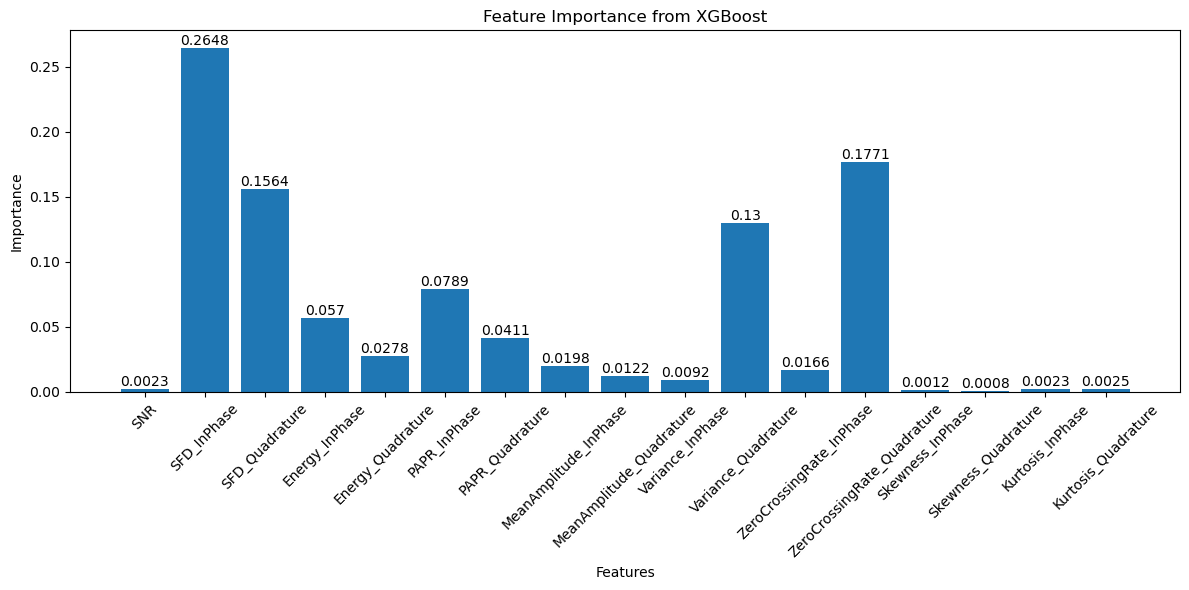

In [53]:


feature_names = [
    'SNR', 'SFD_InPhase', 'SFD_Quadrature',
    'Energy_InPhase', 'Energy_Quadrature',
    'PAPR_InPhase', 'PAPR_Quadrature',
    'MeanAmplitude_InPhase', 'MeanAmplitude_Quadrature',
    'Variance_InPhase', 'Variance_Quadrature',
    'ZeroCrossingRate_InPhase', 'ZeroCrossingRate_Quadrature',
    'Skewness_InPhase', 'Skewness_Quadrature',
    'Kurtosis_InPhase', 'Kurtosis_Quadrature'
]

xgb_model = stack_clf.named_estimators_['XGBoost']
importance = xgb_model.feature_importances_

plt.figure(figsize=(12, 6))
bars = plt.bar(feature_names, importance)

plt.title('Feature Importance from XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# Determine low-importance features
low_importance_threshold = 0.01
low_importance_features = [feature_names[i] for i in range(len(importance)) if importance[i] < low_importance_threshold]

# Print low-importance features
print("Features to consider removing based on low importance:", low_importance_features)


Features to consider removing based on low importance: ['SNR', 'Variance_InPhase', 'Skewness_InPhase', 'Skewness_Quadrature', 'Kurtosis_InPhase', 'Kurtosis_Quadrature']


In [55]:

# Dropping any rows with NaN values
dataset.dropna(inplace=True)

X = dataset[[ 'SFD_InPhase', 'SFD_Quadrature',
    'Energy_InPhase', 'Energy_Quadrature',
    'PAPR_InPhase', 'PAPR_Quadrature',
    'MeanAmplitude_InPhase', 'MeanAmplitude_Quadrature', 'Variance_Quadrature',
    'ZeroCrossingRate_InPhase', 'ZeroCrossingRate_Quadrature']]
y = dataset['Label']

# Encoding the 'Modulation' column (categorical) in X if needed
label_encoder_modulation = LabelEncoder()
dataset['Modulation'] = label_encoder_modulation.fit_transform(dataset['Modulation'])

# Encoding the target label y if needed
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Print to verify the transformations
print(X.head())
print(y[:5])


   SFD_InPhase  SFD_Quadrature  Energy_InPhase  Energy_Quadrature  \
0     1.389887        2.477678        0.299287           0.186513   
1     2.061046        2.538575        0.344202           0.129014   
2     1.786481        2.020951        0.396531           0.105459   
3     1.847495        2.020951        0.099229           0.277851   
4     1.847495        1.807812        0.231044           0.145545   

   PAPR_InPhase  PAPR_Quadrature  MeanAmplitude_InPhase  \
0      1.541296         1.062754               0.235744   
1      2.090342         2.302009               0.145204   
2      0.859132         0.821607               0.200835   
3      1.306809         1.055684              -0.036421   
4      1.230891         1.147300               0.181197   

   MeanAmplitude_Quadrature  Variance_Quadrature  ZeroCrossingRate_InPhase  \
0                 -0.145660             0.588429                  1.377061   
1                 -0.125706             0.535314                  1.971151

In [56]:


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base estimators with best parameters
classifiers = {
    "Naive Bayes": GaussianNB(),  # No hyperparameter tuning for Naive Bayes
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

# Meta-classifier
meta_classifier = LogisticRegression(max_iter=200)

# Define the stacked ensemble with Naive Bayes and XGBoost
stack_clf = StackingClassifier(
    estimators=list(classifiers.items()),
    final_estimator=meta_classifier,
    stack_method='predict_proba'  # Use predict_proba for meta-classifier training
)

# Train the ensemble model
stack_clf.fit(X_train, y_train)

# Now perform 5-fold cross-validation
cv_scores = cross_val_score(stack_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean() * 100
std_cv_score = cv_scores.std() * 100

# Print the results
print(f"Mean CV Accuracy: {mean_cv_score:.2f}%")
print(f"Standard Deviation of CV Accuracy: {std_cv_score:.2f}%")


Mean CV Accuracy: 99.40%
Standard Deviation of CV Accuracy: 0.09%



Training Decision Tree...
Decision Tree Accuracy: 98.14%
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       997
           1       0.96      0.96      0.96      1000
           2       0.98      0.98      0.98      1014
           3       0.98      0.98      0.98       999
           4       1.00      1.00      1.00       990

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



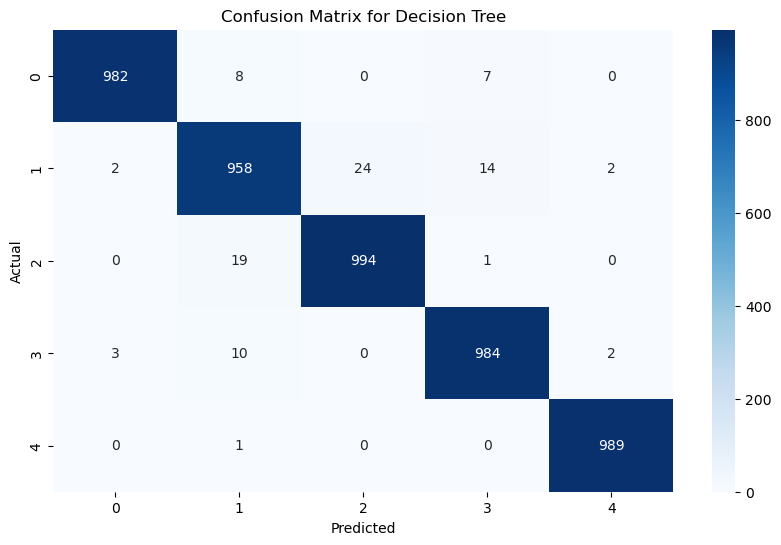


Training Random Forest...
Random Forest Accuracy: 98.82%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       997
           1       0.97      0.98      0.98      1000
           2       1.00      0.97      0.99      1014
           3       0.99      0.99      0.99       999
           4       1.00      1.00      1.00       990

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



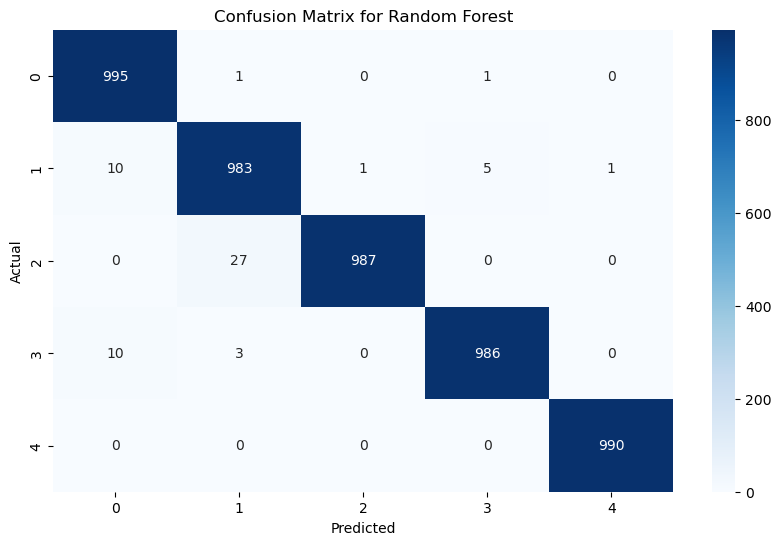


Training Gradient Boosting...
Gradient Boosting Accuracy: 98.76%
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       997
           1       0.97      0.98      0.97      1000
           2       0.99      0.98      0.99      1014
           3       0.99      0.99      0.99       999
           4       1.00      1.00      1.00       990

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



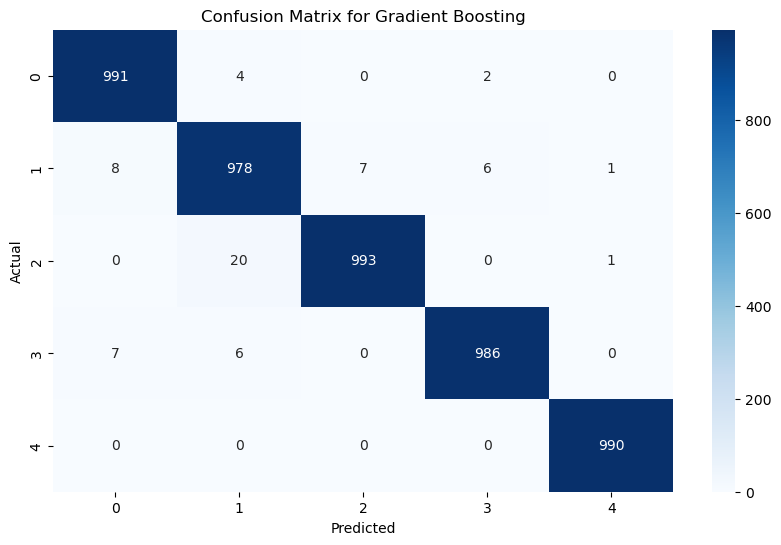


Training Naive Bayes...
Naive Bayes Accuracy: 88.54%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       997
           1       0.76      0.69      0.72      1000
           2       0.78      0.92      0.84      1014
           3       0.95      0.83      0.88       999
           4       1.00      0.98      0.99       990

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.88      5000



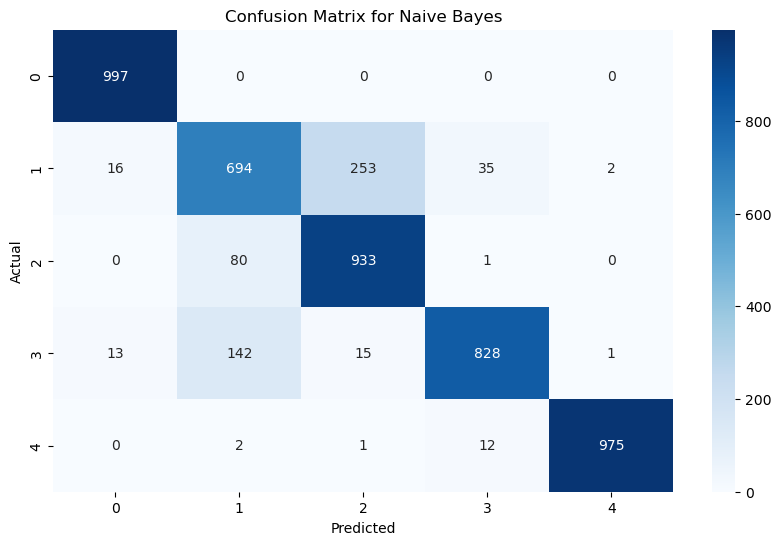


Training Logistic Regression...
Logistic Regression Accuracy: 96.64%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       997
           1       0.95      0.96      0.95      1000
           2       0.95      0.95      0.95      1014
           3       0.99      0.97      0.98       999
           4       0.98      0.96      0.97       990

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



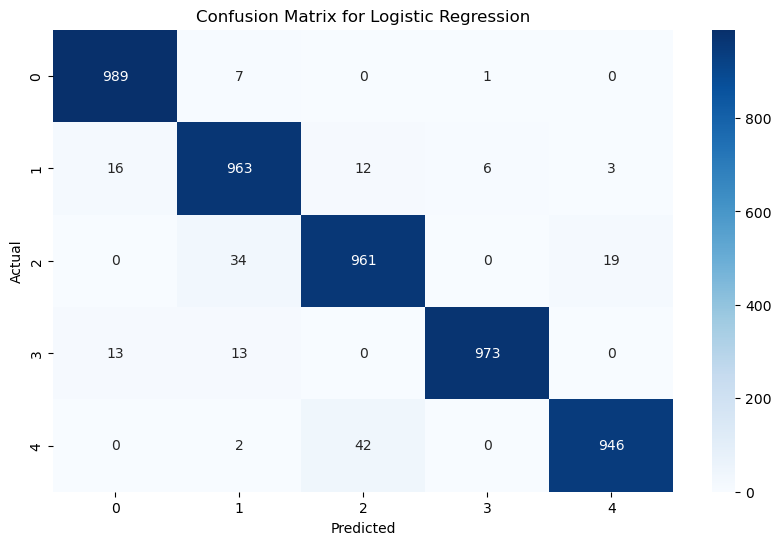


Training KNN...
KNN Accuracy: 98.70%
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       997
           1       0.98      0.97      0.98      1000
           2       0.97      0.99      0.98      1014
           3       1.00      0.99      0.99       999
           4       1.00      0.99      0.99       990

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



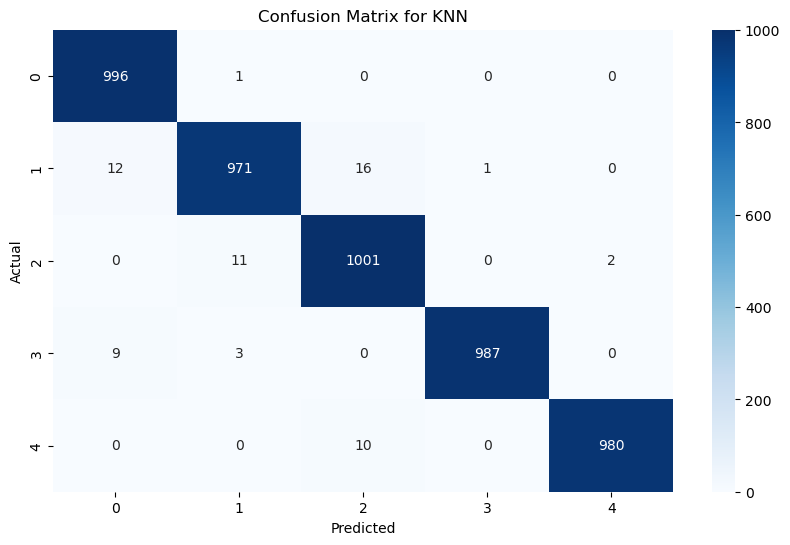


Training SVM...
SVM Accuracy: 97.92%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       997
           1       0.97      0.97      0.97      1000
           2       0.98      0.96      0.97      1014
           3       0.99      0.98      0.99       999
           4       0.98      0.99      0.98       990

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



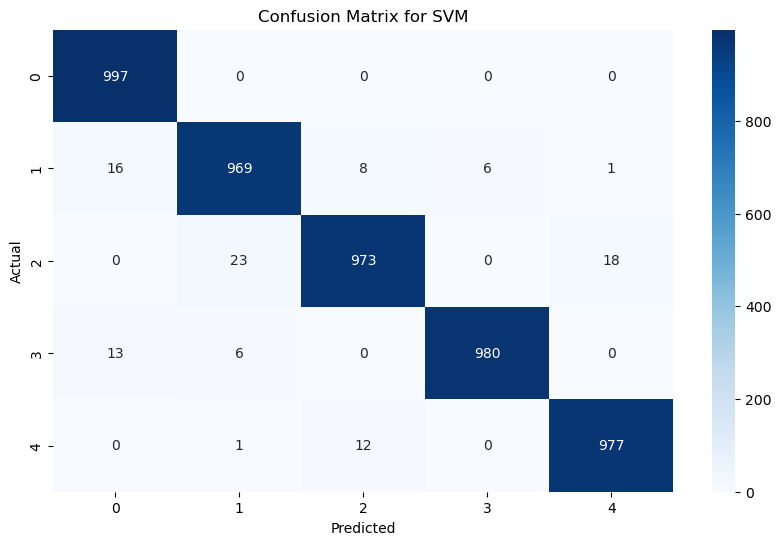


Training XGBoost...


D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 99.16%
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       997
           1       0.98      0.99      0.98      1000
           2       1.00      0.99      0.99      1014
           3       0.99      0.99      0.99       999
           4       1.00      1.00      1.00       990

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



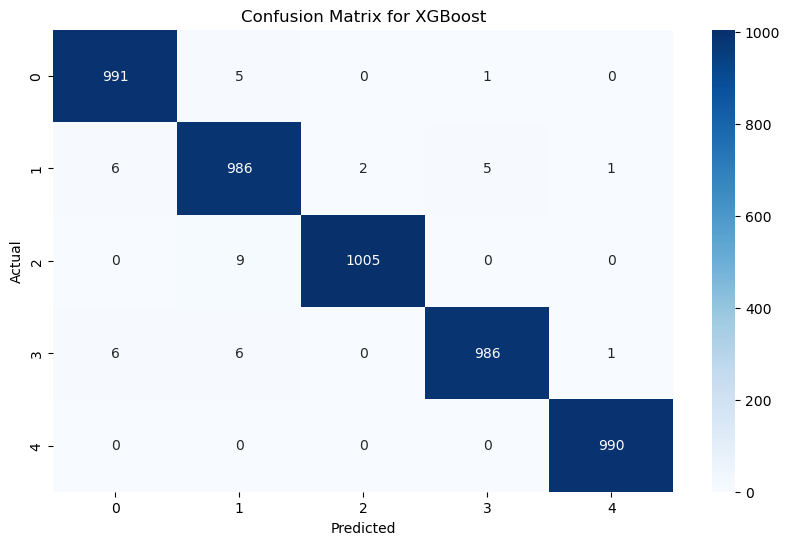


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2110
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 11
[LightGBM] [Info] Start training from score -1.608688
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.612944
[LightGBM] [Info] Start training from score -1.609188
[LightGBM] [Info] Start training from score -1.606941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 99.30%
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       997
           1       0.98      0.99      0.99      1000
           2       1.00      0.99      1.00 

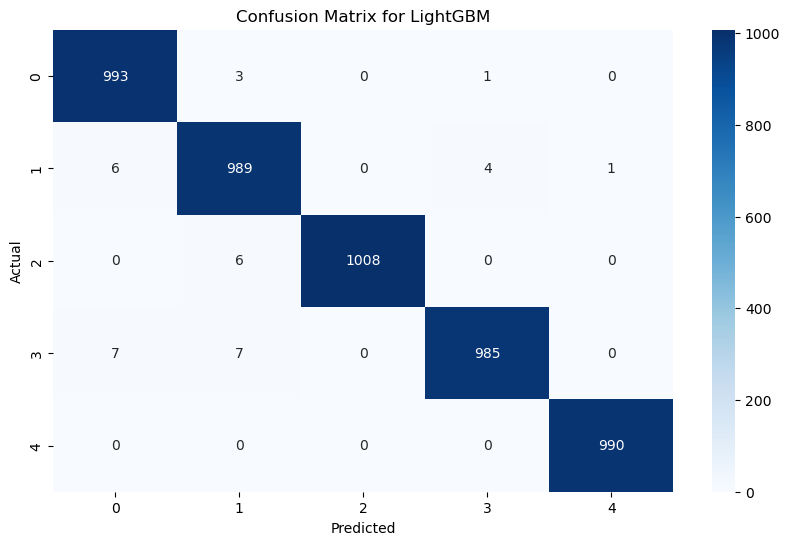


Training CatBoost...
CatBoost Accuracy: 99.12%
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       997
           1       0.98      0.98      0.98      1000
           2       1.00      0.99      0.99      1014
           3       0.99      0.99      0.99       999
           4       1.00      1.00      1.00       990

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



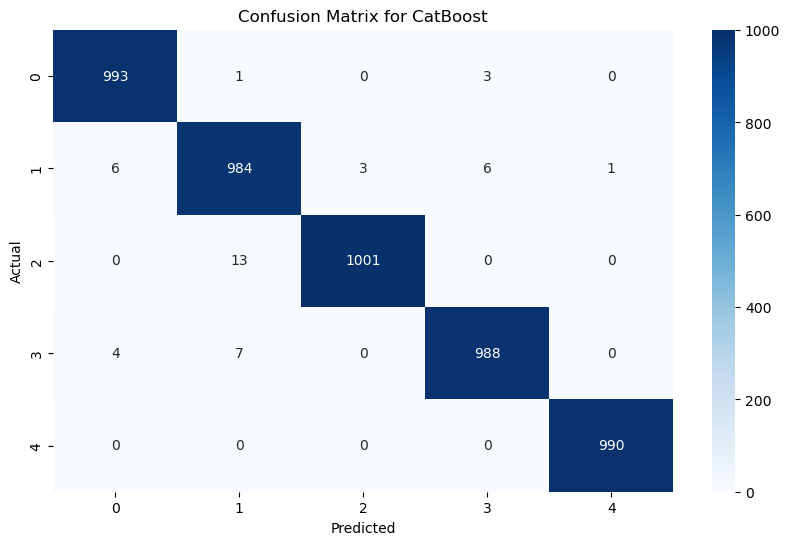


Sorted Classifier Accuracies:
Naive Bayes: 88.5400%
Logistic Regression: 96.6400%
SVM: 97.9200%
Decision Tree: 98.1400%
KNN: 98.7000%
Gradient Boosting: 98.7600%
Random Forest: 98.8200%
CatBoost: 99.1200%
XGBoost: 99.1600%
LightGBM: 99.3000%


In [57]:


# Define a function to train and evaluate classifiers
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, name):
    print(f"\nTraining {name}...")
    
    # Check if input data is 3D and reshape to 2D
    if X_train.ndim == 3:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    # Training the classifier
    classifier.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = classifier.predict(X_test)

    # Calculating accuracy and scores
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name} Accuracy: {acc:.2f}%")
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    return acc  # Return the accuracy for sorting later

# Assuming X_train, X_test, y_train, y_test are defined and are the right dimensions
# List of classifiers to evaluate
classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "Naive Bayes": GaussianNB(),
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}

# Initialize a dictionary to hold the accuracy results
accuracy_results = {}

# Iterate through the classifiers and evaluate each one
for name, clf in classifiers.items():
    # Skip Linear Regression as it is not a classifier
    if name == "Linear Regression":
        continue
    accuracy = train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test, name)
    accuracy_results[name] = accuracy  # Store the accuracy in the results dictionary

# Display the sorted accuracies
sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1])

print("\nSorted Classifier Accuracies:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.4f}%")
